# МАТЕМАТИЧНЕ МОДЕЛЮВАННЯ МАТЕРІАЛІВ ТА ТЕХНОЛОГІЧНИХ ПРОЦЕСІВ В МАТЕРІАЛОЗНАВСТВІ
Комп'ютерний практикум

*Виконав студент групи ФМ-71мп*

*Богомаз Ростислав*

## ІДЕНТИФІКАЦІЙНІ МАТЕМАТИЧНІ МОДЕЛІ. МЕТОД НАЙМЕНШИХ КВАДРАТІВ

**Мета роботи:** освоєння комп’ютерної реалізації багатовимірного методу
найменших квадратів для побудови ідентифікаційних регресійних математичних моделей.

### Завдання та вихідні дані
Побудувати математичну модель, використовуючи дані багатофакторного
експерименту і методику покрокового регресійного аналізу, яка базується на
багатовимірному варіанті методу найменших квадратів. Визначити адекватність моделі.

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.mnk', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'])
df

,X1,X2,X3,X4,X5,X6,Y
0,0.21,0.79,0.20,0.65,1.65,0.07,70
1,0.20,1.10,0.80,0.74,1.51,0.12,73
2,0.19,0.65,1.05,0.87,1.89,0.06,73
3,0.26,0.55,0.39,0.68,1.48,0.15,78
4,0.30,0.59,0.45,0.82,1.18,0.03,80
5,0.18,0.64,0.61,0.91,1.20,0.09,77
6,0.20,0.60,0.63,1.05,1.18,0.00,85
7,0.21,0.58,0.81,0.73,1.54,0.04,73
8,0.25,0.55,0.76,0.92,1.36,0.14,90
9,0.19,1.05,0.44,1.22,1.00,0.00,88


### Порядок виконання

Розмічаємо дані на фактори (матриця X) та результат (массив Y).

In [3]:
X = df.iloc[:,df.columns != 'Y']
Y = df['Y']

Проводимо кореляційний аналіз:

In [4]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,-0.269127,0.224985,-0.258515,-0.034934,-0.016117,-0.155057
X2,-0.269127,1.000000,-0.046189,0.056107,-0.182688,-0.223716,-0.022913
X3,0.224985,-0.046189,1.000000,-0.102816,0.204957,0.009477,-0.043821
X4,-0.258515,0.056107,-0.102816,1.000000,-0.189146,-0.309623,0.381760
X5,-0.034934,-0.182688,0.204957,-0.189146,1.000000,0.029154,-0.337563
X6,-0.016117,-0.223716,0.009477,-0.309623,0.029154,1.000000,-0.144291
Y,-0.155057,-0.022913,-0.043821,0.381760,-0.337563,-0.144291,1.000000


Властивості X1, Х2, Х3 та Х6 мають низький коефіцієнт кореляції тому такі властивості можемо виключити з регресійного аналізу.

In [5]:
Xreduced_1 = X.drop(['X1', 'X2', 'X3', 'X6'], axis=1)

Створюємо регресійну модель:

In [6]:
regressor1 = LinearRegression(normalize=False)
regressor1.fit(Xreduced_1, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_predictions_1 = regressor1.predict(Xreduced_1)

Шукаємо середню похибку та будуємо результат:

In [9]:
error_1 = metrics.mean_squared_error(Y, y_predictions_1)
f'Середня похибка: {error_1}'

'Середня похибка: 35.42700305168125'

Спробуємо побудувати модель з урахуванням всіх властивостей:

In [11]:
regressor_full = LinearRegression(normalize=False)
regressor_full.fit(X, Y)
y_predictions_full = regressor_full.predict(X)
error_full = metrics.mean_squared_error(Y, y_predictions_full)
f'Середня похибка: {error_full}'

'Середня похибка: 33.87138426977624'

In [12]:
(1 - error_full / error_1) * 100

4.3910538513112556

Похибка зменшилась на 4%. Далі побудуємо регресійну модель, в якій виключимо параметри, які мають кореляцію менше 0.1.

In [13]:
Xreduced_2 = X.drop(['X2', 'X3'], axis=1)
regressor2 = LinearRegression(normalize=False)
regressor2.fit(Xreduced_2, Y)
y_predictions_2 = regressor2.predict(Xreduced_2)
error_2 = metrics.mean_squared_error(Y, y_predictions_2)
f'Середня похибка: {error_2}'

'Середня похибка: 35.025536843331025'

In [14]:
(1 - error_2 / error_1) * 100

1.1332209155952566

Похибка зменшилась на 1% у порівнянні з першою моделлю.

Побудуємо дані, які дають кожна з моделей.

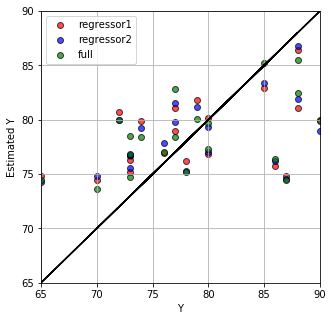

In [21]:
plt.figure(figsize=(5,5))
plt.plot(Y, Y, color='black', label='')

plt.scatter(Y, y_predictions_1, color="red", alpha=.7, edgecolor='black', label='regressor1')
plt.scatter(Y, y_predictions_2, color="blue", alpha=.7, edgecolor='black', label='regressor2')
plt.scatter(Y, y_predictions_full, color="green", alpha=.7, edgecolor='black', label='full')

plt.legend()
plt.xlim(Y.min(), Y.max())
plt.ylim(Y.min(), Y.max())
plt.grid()
plt.xlabel('Y')
plt.ylabel('Estimated Y')